In [1]:
import tensorflow as tf
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from tensorflow.keras import layers, Sequential, Model


In [2]:
X_train = pd.read_csv("data/train/X_train.csv")
X_train

ID Customer_ID     Month            Name   Age          SSN  \
0      0x1d1af  CUS_0x3539  February     an Arakalid    30  995-31-4669   
1      0x1ebd6  CUS_0x8716   January        Matthewz    18  185-99-8068   
2       0x8a66  CUS_0x21dc   January      Tom Miless    41  241-53-8475   
3      0x1d769  CUS_0x32d3     April           Lisaa    35  204-78-6176   
4      0x236dd  CUS_0xadad    August          Masond    27  027-11-6852   
...        ...         ...       ...             ...   ...          ...   
89995  0x13d61  CUS_0x8b0c     April  Ronald Groverk    18  587-03-6623   
89996   0x1604   CUS_0xd40     March   Aaron Maashoh  -500  821-00-0265   
89997   0x7449  CUS_0x6184     April          Sarahc    41  245-92-1411   
89998  0x1a629  CUS_0xb858    August          Gerryy    50  154-48-6016   
89999  0x1c61c  CUS_0xb634     March     Donny Kwoka    41  399-60-8339   

         Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0           Manager      43391.96            3688.996667                  1   
1         Scientist      14351.21                    NaN                  8   
2         Developer     130125.04           10871.753333                  5   
3           Manager      20107.21            1631.600833                  6   
4            Doctor      92186.19            7487.182500                  1   
...             ...           ...                    ...                ...   
89995        Lawyer      9635.555            1034.962917                 10   
89996     Scientist      19114.12                    NaN                  3   
89997        Doctor      30416.28            2346.690000                  5   
89998     Developer      34981.59            2463.387723                  6   
89999  Entrepreneur      67500.54            5642.045000                  7   

       ...  Num_Credit_Inquiries  Credit_Mix Outstanding_Debt  \
0      ...                   0.0        Good          1468.28   
1      ...                   9.0         Bad          4766.87   
2      ...                 645.0        Good          1195.05   
3      ...                  11.0    Standard           2544.6   
4      ...                   4.0        Good           809.01   
...    ...                   ...         ...              ...   
89995  ...                  15.0         Bad          4795.81   
89996  ...                   4.0        Good           809.98   
89997  ...                   3.0        Good          1021.07   
89998  ...                   5.0           _           349.84   
89999  ...                   8.0    Standard          1080.51   

      Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
0                    29.112468   23 Years and 8 Months                    No   
1                    39.849732                     NaN                   Yes   
2                    21.542892  15 Years and 11 Months                    No   
3                    32.423759   19 Years and 4 Months                   Yes   
4                    39.543131   20 Years and 9 Months                    No   
...                        ...                     ...                   ...   
89995                31.854853    1 Years and 7 Months                   Yes   
89996                28.609352   22 Years and 3 Months                    No   
89997                37.749650   18 Years and 7 Months                    No   
89998                28.976225   19 Years and 9 Months                    No   
89999                35.706579                     NaN                   Yes   

      Total_EMI_per_month  Amount_invested_monthly  \
0                0.000000       53.969385063055675   
1               61.098718       118.08021357217683   
2              204.285650       1255.8993022448951   
3               27.106395        66.81977464950728   
4              185.797654       115.52003931707223   
...                   ...                      ...   
89995           55.980058        91.512613

In [3]:

y_train = pd.read_csv("data/train/y_train.csv")
y_train

Credit_Score
0             Good
1             Poor
2             Good
3             Poor
4             Good
...            ...
89995         Poor
89996         Good
89997         Good
89998         Good
89999     Standard

[90000 rows x 1 columns]

In [4]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data

ID Customer_ID     Month            Name   Age          SSN  \
0      0x1d1af  CUS_0x3539  February     an Arakalid    30  995-31-4669   
1      0x1ebd6  CUS_0x8716   January        Matthewz    18  185-99-8068   
2       0x8a66  CUS_0x21dc   January      Tom Miless    41  241-53-8475   
3      0x1d769  CUS_0x32d3     April           Lisaa    35  204-78-6176   
4      0x236dd  CUS_0xadad    August          Masond    27  027-11-6852   
...        ...         ...       ...             ...   ...          ...   
89995  0x13d61  CUS_0x8b0c     April  Ronald Groverk    18  587-03-6623   
89996   0x1604   CUS_0xd40     March   Aaron Maashoh  -500  821-00-0265   
89997   0x7449  CUS_0x6184     April          Sarahc    41  245-92-1411   
89998  0x1a629  CUS_0xb858    August          Gerryy    50  154-48-6016   
89999  0x1c61c  CUS_0xb634     March     Donny Kwoka    41  399-60-8339   

         Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0           Manager      43391.96            3688.996667                  1   
1         Scientist      14351.21                    NaN                  8   
2         Developer     130125.04           10871.753333                  5   
3           Manager      20107.21            1631.600833                  6   
4            Doctor      92186.19            7487.182500                  1   
...             ...           ...                    ...                ...   
89995        Lawyer      9635.555            1034.962917                 10   
89996     Scientist      19114.12                    NaN                  3   
89997        Doctor      30416.28            2346.690000                  5   
89998     Developer      34981.59            2463.387723                  6   
89999  Entrepreneur      67500.54            5642.045000                  7   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0      ...        Good           1468.28                29.112468   
1      ...         Bad           4766.87                39.849732   
2      ...        Good           1195.05                21.542892   
3      ...    Standard            2544.6                32.423759   
4      ...        Good            809.01                39.543131   
...    ...         ...               ...                      ...   
89995  ...         Bad           4795.81                31.854853   
89996  ...        Good            809.98                28.609352   
89997  ...        Good           1021.07                37.749650   
89998  ...           _            349.84                28.976225   
89999  ...    Standard           1080.51                35.706579   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       23 Years and 8 Months                     No            0.000000   
1                         NaN                    Yes           61.098718   
2      15 Years and 11 Months                     No          204.285650   
3       19 Years and 4 Months                    Yes           27.106395   
4       20 Years and 9 Months                     No          185.797654   
...                       ...                    ...                 ...   
89995    1 Years and 7 Months                    Yes           55.980058   
89996   22 Years and 3 Months                     No           49.574949   
89997   18 Years and 7 Months                     No            0.000000   
89998   19 Years and 9 Months                     No          291.550011   
89999                     NaN                    Yes          273.952372   

      Amount_invested_monthly                 Payment_Behaviour  \
0          53.969385063055675   High_spent_Large_value_payments   
1          118.08021357217683    Low_spent_Small_value_payments   
2          1255.8993022448951    Low_spent_Small_value_payments   
3           66.81977464950728    Low_spent_Small_value_payments   
4          115.52003931707223  High_spent_Medium_value_payments   
...               

In [5]:
profile = ProfileReport(train_data, title="Train Data Profile")

In [6]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        90000 non-null  object 
 1   Customer_ID               90000 non-null  object 
 2   Month                     90000 non-null  object 
 3   Name                      81023 non-null  object 
 4   Age                       90000 non-null  object 
 5   SSN                       90000 non-null  object 
 6   Occupation                90000 non-null  object 
 7   Annual_Income             90000 non-null  object 
 8   Monthly_Inhand_Salary     76512 non-null  float64
 9   Num_Bank_Accounts         90000 non-null  int64  
 10  Num_Credit_Card           90000 non-null  int64  
 11  Interest_Rate             90000 non-null  int64  
 12  Num_of_Loan               90000 non-null  object 
 13  Type_of_Loan              79672 non-null  object 
 14  Delay_

In [8]:
train_data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         8977
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       13488
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10328
Delay_from_due_date             0
Num_of_Delayed_Payment       6305
Changed_Credit_Limit            0
Num_Credit_Inquiries         1794
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8124
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3993
Payment_Behaviour               0
Monthly_Balance              1084
Credit_Score                    0
dtype: int64

In [9]:
train_data["Month"].unique()

array(['February', 'January', 'April', 'August', 'March', 'May', 'June',
       'July'], dtype=object)

### Explore the Age column

In [10]:
train_data["Age"].min(), train_data["Age"].max()

('-500', '995')

In [11]:
# Create a copy of the train dataset to explore the train data without changing it
cp = train_data.copy()


for i in cp["Age"]:
    if "_" in i:
        cp["Age"].replace(i, i[:-1], inplace=True)

In [12]:
cp[cp["Age"].astype(float) < 0]["Age"].count()

793

In [13]:
cp["Age"] = cp[~(cp["Age"].astype(float) < 0)]["Age"]

In [14]:
cp["Age"] = cp["Age"].astype(float)

In [15]:
cp["Age"].isnull().sum()

793

### Explore the Occupation column

In [16]:
train_data["Occupation"].unique()

array(['Manager', 'Scientist', 'Developer', 'Doctor', 'Teacher',
       'Musician', 'Media_Manager', 'Architect', 'Lawyer', 'Accountant',
       'Entrepreneur', 'Engineer', '_______', 'Journalist', 'Writer',
       'Mechanic'], dtype=object)

In [17]:
train_data[train_data["Occupation"] == "_______"]["Occupation"].count()

6367

In [18]:
train_data["Occupation"].isnull().sum()

0

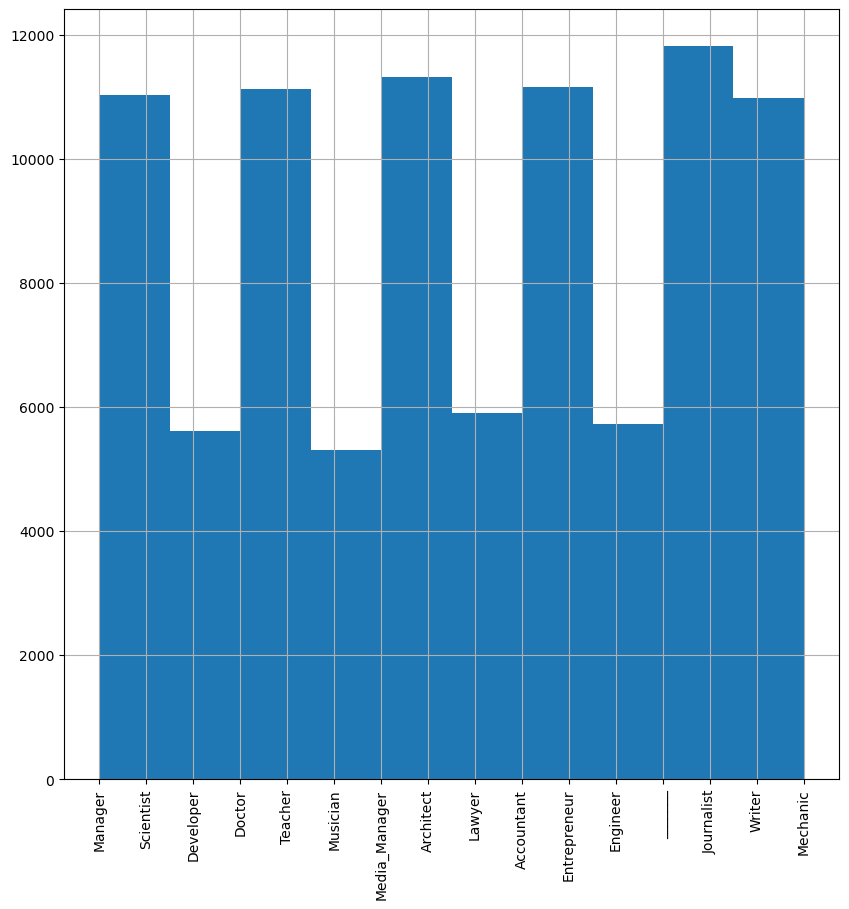

In [350]:
train_data["Occupation"].hist(figsize=(10,10), xrot=90);

### Explore the Annual_Income column

In [20]:
train_data["Annual_Income"].max()

'99995.22'

In [21]:
train_data["Annual_Income"].dtype

dtype('O')

#### Making modifications to the copy of train data to explore the Annul_Income column

In [22]:
cp.head()

ID Customer_ID     Month         Name   Age          SSN Occupation  \
0  0x1d1af  CUS_0x3539  February  an Arakalid  30.0  995-31-4669    Manager   
1  0x1ebd6  CUS_0x8716   January     Matthewz  18.0  185-99-8068  Scientist   
2   0x8a66  CUS_0x21dc   January   Tom Miless  41.0  241-53-8475  Developer   
3  0x1d769  CUS_0x32d3     April        Lisaa  35.0  204-78-6176    Manager   
4  0x236dd  CUS_0xadad    August       Masond  27.0  027-11-6852     Doctor   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      43391.96            3688.996667                  1  ...        Good   
1      14351.21                    NaN                  8  ...         Bad   
2     130125.04           10871.753333                  5  ...        Good   
3      20107.21            1631.600833                  6  ...    Standard   
4      92186.19            7487.182500                  1  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio      Credit_History_Age  \
0           1468.28                29.112468   23 Years and 8 Months   
1           4766.87                39.849732                     NaN   
2           1195.05                21.542892  15 Years and 11 Months   
3            2544.6                32.423759   19 Years and 4 Months   
4            809.01                39.543131   20 Years and 9 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No            0.000000      53.969385063055675   
1                    Yes           61.098718      118.08021357217683   
2                     No          204.285650      1255.8993022448951   
3                    Yes           27.106395       66.81977464950728   
4                     No          185.797654      115.52003931707223   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Large_value_payments   554.9302816036111         Good  
1    Low_spent_Small_value_payments   238.3144849566528         Poor  
2    Low_spent_Small_value_payments                 NaN         Good  
3    Low_spent_Small_value_payments  359.23391378882377         Poor  
4  High_spent_Medium_value_payments   697.4005568630175         Good  

[5 rows x 28 columns]

In [23]:
# Remove _ at the end of numbers in Annual_Income
for i in cp["Annual_Income"]:
    if "_" in i:
        cp["Annual_Income"].replace(i, i[:-1], inplace=True)

In [24]:
cp[cp["Annual_Income"].astype(float) < 0]

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

[0 rows x 28 columns]

### Exploring the Monthly_Inhand_Salary column

In [25]:
train_data["Monthly_Inhand_Salary"].dtype

dtype('float64')

In [26]:
train_data["Monthly_Inhand_Salary"].min(), train_data["Monthly_Inhand_Salary"].max()

(303.6454166666666, 15204.633333333331)

In [27]:
train_data["Monthly_Inhand_Salary"].mean(), train_data["Monthly_Inhand_Salary"].median()

(4193.129009890097, 3088.475)

In [28]:
train_data["Monthly_Inhand_Salary"].isnull().sum()

13488

In [29]:
train_data["Monthly_Inhand_Salary"].sort_values(ascending=False)

56116    15204.633333
51402    15204.633333
26183    15204.633333
72006    15204.633333
37393    15204.633333
             ...     
89932             NaN
89963             NaN
89977             NaN
89987             NaN
89996             NaN
Name: Monthly_Inhand_Salary, Length: 90000, dtype: float64

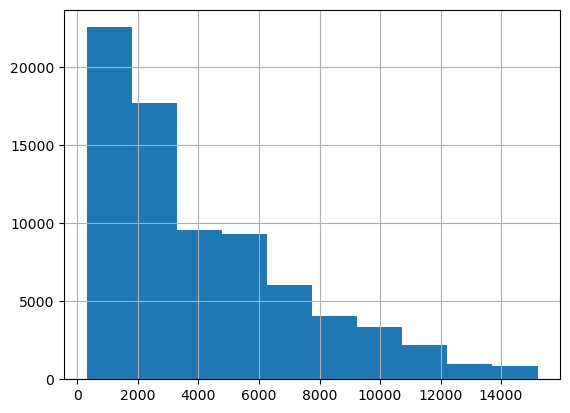

In [30]:
train_data["Monthly_Inhand_Salary"].hist();

### Exploring the Num_Bank_Accounts column

In [31]:
train_data["Num_Bank_Accounts"].dtype

dtype('int64')

In [32]:
train_data["Num_Bank_Accounts"].min(), train_data["Num_Bank_Accounts"].max()

(-1, 1798)

In [33]:
train_data[train_data["Num_Bank_Accounts"] < 0]["Num_Bank_Accounts"].count()

21

In [34]:
train_data[train_data["Num_Bank_Accounts"] > 30]["Num_Bank_Accounts"].count()

1142

### Exploring the Num_Credit_Card column

In [35]:
train_data["Num_Credit_Card"].dtype

dtype('int64')

In [36]:
train_data["Num_Credit_Card"].min(), train_data["Num_Credit_Card"].max()

(0, 1499)

In [37]:
train_data["Num_Credit_Card"].isnull().sum()

0

In [38]:
train_data[train_data["Num_Credit_Card"] > 40]["Num_Credit_Card"].count()

2009

### Exploring the Interest_Rate column

In [39]:
train_data["Interest_Rate"].dtype

dtype('int64')

In [40]:
train_data["Interest_Rate"].isnull().sum()

0

In [41]:
train_data["Interest_Rate"].min(), train_data["Interest_Rate"].max()

(1, 5797)

In [42]:
train_data["Interest_Rate"].sort_values()

85597       1
69959       1
38109       1
19604       1
38132       1
         ... 
38302    5775
20454    5776
32913    5788
53723    5789
82978    5797
Name: Interest_Rate, Length: 90000, dtype: int64

### Exploring the Num_of_Loan column

In [43]:
train_data["Num_of_Loan"].dtype

dtype('O')

In [44]:
train_data["Num_of_Loan"].sort_values()

11284    -100
71891    -100
71893    -100
8672     -100
3741     -100
         ... 
1391       9_
38992      9_
81407      9_
49411      9_
9653       9_
Name: Num_of_Loan, Length: 90000, dtype: object

In [45]:
train_data["Num_of_Loan"].min(), train_data["Num_of_Loan"].max()

('-100', '9_')

#### Create a copy of train_data to explore the Num_of_Loan Column without changing the train data

In [46]:
cp = train_data.copy()

In [47]:
for i in cp["Num_of_Loan"]:
    if "_" in i:
        cp["Num_of_Loan"].replace(i, i[:-1], inplace=True)

In [48]:
cp["Num_of_Loan"].min(), cp["Num_of_Loan"].max()

('-100', '999')

In [49]:
cp[cp["Num_of_Loan"].astype(float) < 0]["Num_of_Loan"].count()

3472

In [50]:
cp[cp["Num_of_Loan"].astype(float) < 0]["Num_of_Loan"].count()

3472

### Exploring the Type_of_Loan column

In [51]:
train_data["Type_of_Loan"].dtype

dtype('O')

In [52]:
train_data["Type_of_Loan"][:10]

0                                                  NaN
1    Mortgage Loan, Personal Loan, Not Specified, S...
2           Mortgage Loan, and Debt Consolidation Loan
3            Credit-Builder Loan, and Home Equity Loan
4    Personal Loan, Auto Loan, Not Specified, and P...
5        Student Loan, Home Equity Loan, and Auto Loan
6                      Student Loan, and Not Specified
7                                                  NaN
8                                        Not Specified
9    Home Equity Loan, Home Equity Loan, Mortgage L...
Name: Type_of_Loan, dtype: object

In [53]:
len(train_data["Type_of_Loan"].unique())

6261

In [54]:
train_data["Type_of_Loan"].isnull().sum()

10328

In [55]:
row_lens = [len(i.split()) for i in train_data["Type_of_Loan"].dropna()]
avg_row_len = np.mean(row_lens)
avg_row_len

9.72464604880008

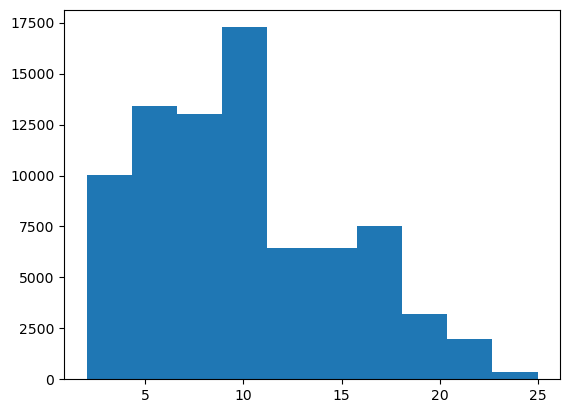

In [56]:
plt.hist(row_lens);

In [57]:
for i in train_data["Type_of_Loan"][:10]:
    print(i)

nan
Mortgage Loan, Personal Loan, Not Specified, Student Loan, Personal Loan, and Student Loan
Mortgage Loan, and Debt Consolidation Loan
Credit-Builder Loan, and Home Equity Loan
Personal Loan, Auto Loan, Not Specified, and Personal Loan
Student Loan, Home Equity Loan, and Auto Loan
Student Loan, and Not Specified
nan
Not Specified
Home Equity Loan, Home Equity Loan, Mortgage Loan, Payday Loan, and Mortgage Loan


In [58]:
# Does null mean 0 loans?
train_data[train_data["Type_of_Loan"].isnull()]["Num_of_Loan"].unique()

array(['0', '0_', '-100', '1416', '103', '1451', '507', '911', '172',
       '33', '1369', '1074', '652', '831', '859', '153', '940', '1227',
       '1447', '1129', '439', '1070', '654', '1478', '378_', '621',
       '1347_', '501', '336', '437', '350', '372', '193', '546', '1430',
       '999', '1296', '394', '215', '143', '1384', '1382', '275', '288',
       '18', '1419', '773', '252', '1035', '330', '126', '881', '897',
       '415', '83', '238', '801', '538', '1027_'], dtype=object)

## Idea on how to preprocess this column:
    * Split the individuals words (mortage, personal, student, etc) 
    * Create new columns that accept only 0 and 1 (do they have a mortage loan - 1, student - 0, etc, etc)

In [59]:
# Create a copy of the Type_of_Loan column (remove nulls first)
x = train_data["Type_of_Loan"].replace(np.nan, "Not Specified")
x

0                                            Not Specified
1        Mortgage Loan, Personal Loan, Not Specified, S...
2               Mortgage Loan, and Debt Consolidation Loan
3                Credit-Builder Loan, and Home Equity Loan
4        Personal Loan, Auto Loan, Not Specified, and P...
                               ...                        
89995    Home Equity Loan, Student Loan, Payday Loan, S...
89996    Auto Loan, Credit-Builder Loan, Personal Loan,...
89997                                        Not Specified
89998       Auto Loan, Not Specified, and Home Equity Loan
89999    Debt Consolidation Loan, Student Loan, Not Spe...
Name: Type_of_Loan, Length: 90000, dtype: object

In [60]:
# Find all unique loan types
unique_words = []

for i in x:
    for j in i.split(","):
        unique_words.append(j.strip())
        
unique_words = list(set(unique_words))

for idx, i in enumerate(unique_words):
    if "and" in i:
        unique_words[idx] = i[4:]
        
unique_words = list(set(unique_words))
unique_words

['Personal Loan',
 'Payday Loan',
 'Debt Consolidation Loan',
 'Mortgage Loan',
 'Home Equity Loan',
 'Not Specified',
 'Student Loan',
 'Auto Loan',
 'Credit-Builder Loan']

In [61]:
# Create a copy of the train data to play around with preprocessing
cp_tp_loan = train_data.copy()
cp_tp_loan = cp_tp_loan.dropna() # remove nulls for convenience

In [62]:
# Create corresponding columns for each loan type, and assign 0 or 1
# If one has a payday loan and an auto loan, they will have 1s assigned in the columns Payday_Loan and Auto_Loan

for i in unique_words:
    cp_tp_loan[i.replace(" ", "_")] = [int(i in j) for j in cp_tp_loan["Type_of_Loan"]]

    
cp_tp_loan

ID Customer_ID   Month             Name Age          SSN  \
3      0x1d769  CUS_0x32d3   April            Lisaa  35  204-78-6176   
4      0x236dd  CUS_0xadad  August           Masond  27  027-11-6852   
5      0x1d5dc  CUS_0x500d   March  Suzanne Barlynf  42  872-67-0804   
9      0x13b68  CUS_0xbef3   March          Abboudq  22  239-39-4735   
10      0xb84f  CUS_0xaed6    June            Lucyw  45  768-75-7275   
...        ...         ...     ...              ...  ..          ...   
89991  0x1b7d3  CUS_0x3ad0    June     Abhirup Roym  50  630-81-4444   
89992  0x2256c  CUS_0x3077    July          Palmern  29  226-22-5425   
89994  0x105fc  CUS_0x5bff    July            Tonir  31  731-35-0994   
89995  0x13d61  CUS_0x8b0c   April   Ronald Groverk  18  587-03-6623   
89998  0x1a629  CUS_0xb858  August           Gerryy  50  154-48-6016   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
3        Manager      20107.21            1631.600833                  6  ...   
4         Doctor      92186.19            7487.182500                  1  ...   
5        Teacher      44998.71            3916.892500                 10  ...   
9        Manager      9155.455             470.954583                  6  ...   
10        Lawyer     16096.54_            1253.378333                  3  ...   
...          ...           ...                    ...                ...  ...   
89991   Musician      28630.01            2637.834167                  1  ...   
89992     Doctor      32300.64            2566.720000                  6  ...   
89994     Lawyer     119113.71            9694.142500                  4  ...   
89995     Lawyer      9635.555            1034.962917                 10  ...   
89998  Developer      34981.59            2463.387723                  6  ...   

       Credit_Score  Personal_Loan Payday_Loan Debt_Consolidation_Loan  \
3              Poor              0           0                       0   
4              Good              1           0                       0   
5              Poor              0           0                       0   
9          Standard              0           1                       0   
10         Standard              0           0                       0   
...             ...            ...         ...                     ...   
89991      Standard              1           0                       0   
89992      Standard              0           0                       1   
89994          Good              1           0                       0   
89995          Poor              1           1                       1   
89998          Good              0           0                       0   

       Mortgage_Loan Home_Equity_Loan Not_Specified  Student_Loan Auto_Loan  \
3                  0                1             0             0         0   
4                  0                0             1             0         1   
5                  0                1             0             1         1   
9                  1                1             0             0         0   
10                 0                0             0             0         0   
...              ...              ...           ...           ...       ...   
89991              0                0             0             0         0   
89992              0                0             1             0         1   
89994              0                0             0             0         1   
89995              0                1             0             1         1   
89998              0                1             1             0         1   

      Credit-Builder_Loan  
3                       1  
4                       0  
5                       0  
9                       0  
10                      1  
...                   ...  
89991                   0  
89992                   1  
89994                   0  
89995                   0  
89998                   0  


### Exploring the Delay_from_due_date column

In [63]:
train_data["Delay_from_due_date"].dtype

dtype('int64')

In [64]:
train_data["Delay_from_due_date"].sort_values()

19553    -5
83044    -5
17799    -5
87457    -5
62004    -5
         ..
33028    67
3492     67
2967     67
85528    67
18187    67
Name: Delay_from_due_date, Length: 90000, dtype: int64

In [65]:
train_data[train_data["Delay_from_due_date"] < 0]["Delay_from_due_date"].count()

524

In [66]:
train_data["Delay_from_due_date"].isnull().sum()

0

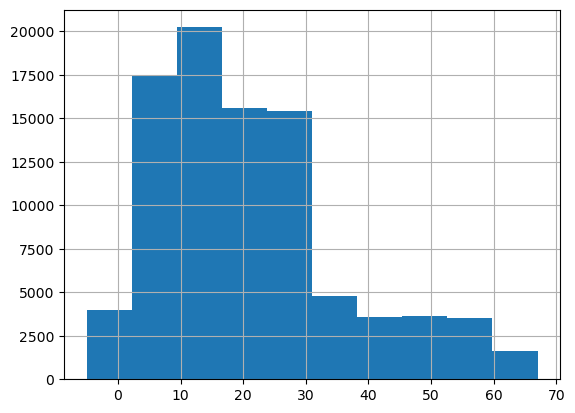

In [67]:
train_data["Delay_from_due_date"].hist();

### Exploring the Num_of_Delayed_Payment column

In [68]:
train_data["Num_of_Delayed_Payment"].dtype

dtype('O')

In [69]:
train_data["Num_of_Delayed_Payment"].sort_values()

83371     -1
32639     -1
71146     -1
11086     -1
5380      -1
        ... 
89902    NaN
89945    NaN
89963    NaN
89964    NaN
89993    NaN
Name: Num_of_Delayed_Payment, Length: 90000, dtype: object

In [70]:
# Create a copy of the train_data to explore this colum without changing the original data
cp_delayed_payments = train_data.copy()

In [71]:
for i in cp_delayed_payments["Num_of_Delayed_Payment"].dropna():
    if "_" in i:
        cp_delayed_payments["Num_of_Delayed_Payment"].replace(i, i[:-1], inplace=True)


In [72]:
cp_delayed_payments = cp_delayed_payments["Num_of_Delayed_Payment"].dropna()

In [73]:
count = 0
for i in cp_delayed_payments.astype(float):
    if i < 0:
        count += 1
        
print(count)
    

571


### Exploring the Changed_Credit_Limit column

In [74]:
train_data["Changed_Credit_Limit"].dtype

dtype('O')

In [75]:
train_data[train_data["Changed_Credit_Limit"] == "_"].count()

ID                          1867
Customer_ID                 1867
Month                       1867
Name                        1676
Age                         1867
SSN                         1867
Occupation                  1867
Annual_Income               1867
Monthly_Inhand_Salary       1593
Num_Bank_Accounts           1867
Num_Credit_Card             1867
Interest_Rate               1867
Num_of_Loan                 1867
Type_of_Loan                1626
Delay_from_due_date         1867
Num_of_Delayed_Payment      1742
Changed_Credit_Limit        1867
Num_Credit_Inquiries        1828
Credit_Mix                  1867
Outstanding_Debt            1867
Credit_Utilization_Ratio    1867
Credit_History_Age          1694
Payment_of_Min_Amount       1867
Total_EMI_per_month         1867
Amount_invested_monthly     1776
Payment_Behaviour           1867
Monthly_Balance             1851
Credit_Score                1867
dtype: int64

In [76]:
train_data["Changed_Credit_Limit"].replace("_", np.nan)

0        10.72
1        21.91
2         3.82
3         10.4
4         9.74
         ...  
89995    15.28
89996      NaN
89997     1.33
89998      7.2
89999    12.47
Name: Changed_Credit_Limit, Length: 90000, dtype: object

In [77]:
train_data["Changed_Credit_Limit"].replace("_", np.nan).dropna().astype(float) 

0        10.72
1        21.91
2         3.82
3        10.40
4         9.74
         ...  
89994     5.85
89995    15.28
89997     1.33
89998     7.20
89999    12.47
Name: Changed_Credit_Limit, Length: 88133, dtype: float64

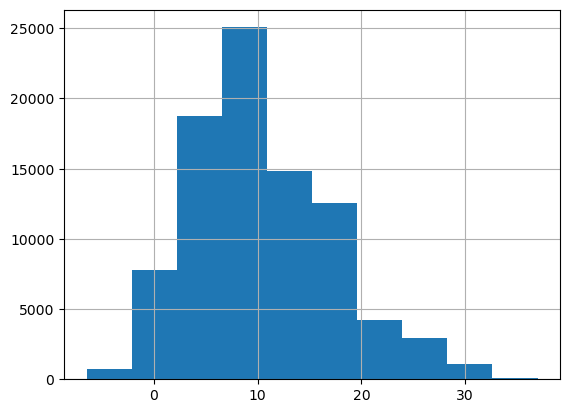

In [78]:
train_data["Changed_Credit_Limit"].replace("_", np.nan).dropna().astype(float).hist();

In [79]:
train_data["Changed_Credit_Limit"].replace("_", np.nan).dropna().astype(float).sort_values()

88834    -6.49
55697    -6.48
4259     -6.45
26328    -6.44
18695    -6.44
         ...  
14321    35.98
57715    36.09
13338    36.29
84038    36.49
34623    36.97
Name: Changed_Credit_Limit, Length: 88133, dtype: float64

In [80]:
count += 0
for i in train_data["Changed_Credit_Limit"].replace("_", np.nan).dropna().astype(float): 
    if i < 0:
        count += 1
        
count

1997

### Exploring the Num_Credit_Inquiries column

In [81]:
train_data["Num_Credit_Inquiries"].dtype

dtype('float64')

In [82]:
train_data["Num_Credit_Inquiries"].isnull().sum()

1794

In [83]:
train_data["Num_Credit_Inquiries"].mean()

27.984864975171757

In [84]:
train_data["Num_Credit_Inquiries"].min(), train_data["Num_Credit_Inquiries"].max()

(0.0, 2597.0)

### Credit Credit_Mix

In [85]:
train_data["Credit_Mix"].dtype

dtype('O')

In [86]:
train_data["Credit_Mix"]

0            Good
1             Bad
2            Good
3        Standard
4            Good
           ...   
89995         Bad
89996        Good
89997        Good
89998           _
89999    Standard
Name: Credit_Mix, Length: 90000, dtype: object

In [87]:
train_data["Credit_Mix"].unique()

array(['Good', 'Bad', 'Standard', '_'], dtype=object)

In [88]:
train_data[train_data["Credit_Mix"] == "_"].count()

ID                          18139
Customer_ID                 18139
Month                       18139
Name                        16327
Age                         18139
SSN                         18139
Occupation                  18139
Annual_Income               18139
Monthly_Inhand_Salary       15403
Num_Bank_Accounts           18139
Num_Credit_Card             18139
Interest_Rate               18139
Num_of_Loan                 18139
Type_of_Loan                15937
Delay_from_due_date         18139
Num_of_Delayed_Payment      16883
Changed_Credit_Limit        18139
Num_Credit_Inquiries        17786
Credit_Mix                  18139
Outstanding_Debt            18139
Credit_Utilization_Ratio    18139
Credit_History_Age          16522
Payment_of_Min_Amount       18139
Total_EMI_per_month         18139
Amount_invested_monthly     17370
Payment_Behaviour           18139
Monthly_Balance             17929
Credit_Score                18139
dtype: int64

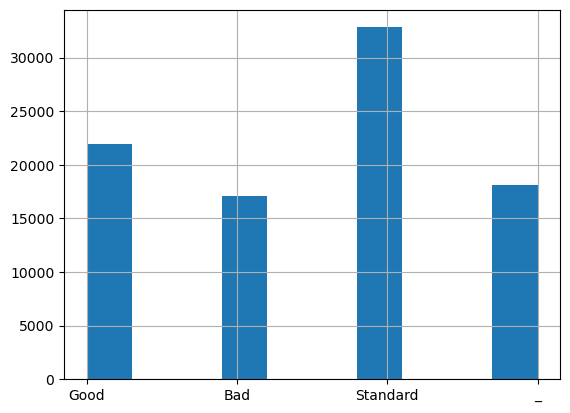

In [89]:
train_data["Credit_Mix"].hist();

### Exploring the Outstanding_Debt column

In [90]:
train_data["Outstanding_Debt"].dtype

dtype('O')

In [91]:
train_data["Outstanding_Debt"].isnull().sum()

0

In [92]:
train_data["Outstanding_Debt"].sort_values()

58468      0.23
52702      0.23
75525      0.23
25555      0.23
32103      0.23
          ...  
66289    999.48
25748    999.48
14045    999.48
44294    999.48
5719     999.48
Name: Outstanding_Debt, Length: 90000, dtype: object

In [93]:
# Check for bad data (from previous columns, it is probably "_" at the end of numbers)

for i in train_data["Outstanding_Debt"][:100]:
    try: 
        float(i)
    except:
        print(i)

2577.55_


In [94]:
# Create a copy of the training set to explore the Outstanding_Debt column without altering the main dataset
cp_odebt = train_data.copy()

In [95]:
for i in cp_odebt["Outstanding_Debt"]:
    if "_" in i:
        cp_odebt["Outstanding_Debt"].replace(i, i[:-1], inplace=True)
        
cp_odebt["Outstanding_Debt"] = cp_odebt["Outstanding_Debt"].astype(float)

In [96]:
cp_odebt["Outstanding_Debt"].min(), cp_odebt["Outstanding_Debt"].max()

(0.23, 4998.07)

In [97]:
cp_odebt["Outstanding_Debt"].mean(), cp_odebt["Outstanding_Debt"].median()

(1426.166394888889, 1166.08)

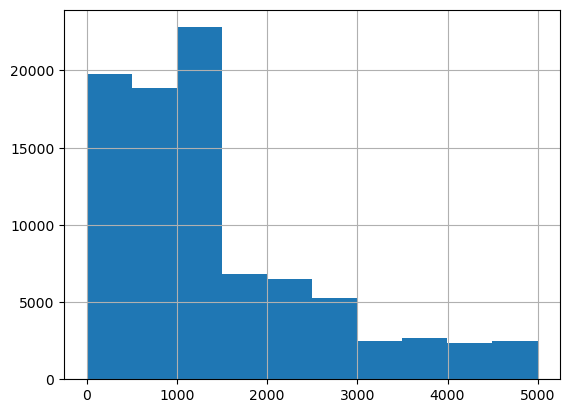

In [98]:
cp_odebt["Outstanding_Debt"].hist();

### Exploring the Credit_Utilization_Ratio column

In [99]:
train_data["Credit_Utilization_Ratio"].dtype

dtype('float64')

In [100]:
train_data["Credit_Utilization_Ratio"].isnull().sum()

0

In [101]:
train_data["Credit_Utilization_Ratio"][:10]

0    29.112468
1    39.849732
2    21.542892
3    32.423759
4    39.543131
5    24.798943
6    34.706491
7    28.693475
8    28.350773
9    37.030388
Name: Credit_Utilization_Ratio, dtype: float64

In [102]:
train_data["Credit_Utilization_Ratio"].sort_values()

78583    20.000000
2469     20.100770
3642     20.172942
83659    20.244130
2425     20.257073
           ...    
58286    49.064277
47319    49.254983
51496    49.522324
62116    49.564519
70139    50.000000
Name: Credit_Utilization_Ratio, Length: 90000, dtype: float64

In [103]:
train_data["Credit_Utilization_Ratio"].mean(), train_data["Credit_Utilization_Ratio"].median()

(32.28402402388251, 32.301466950244254)

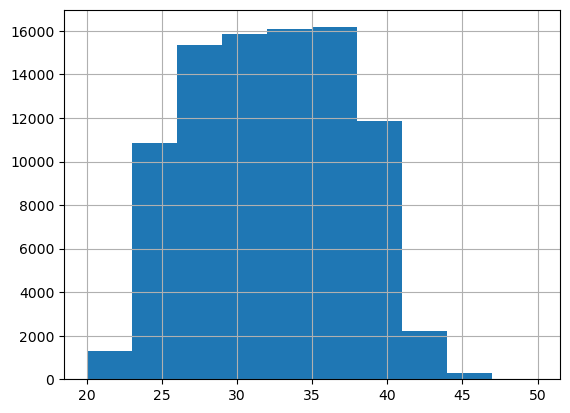

In [104]:
train_data["Credit_Utilization_Ratio"].hist();

### Exploring the Credit_History_Age column

In [105]:
train_data["Credit_History_Age"].dtype

dtype('O')

In [106]:
train_data["Credit_History_Age"]

0         23 Years and 8 Months
1                           NaN
2        15 Years and 11 Months
3         19 Years and 4 Months
4         20 Years and 9 Months
                  ...          
89995      1 Years and 7 Months
89996     22 Years and 3 Months
89997     18 Years and 7 Months
89998     19 Years and 9 Months
89999                       NaN
Name: Credit_History_Age, Length: 90000, dtype: object

In [107]:
train_data["Credit_History_Age"].isnull().sum()

8124

In [108]:
# How many unique values are there?
len(train_data["Credit_History_Age"].dropna().unique())

404

#### Convert string formatted durations into numbers in months

In [109]:
# Split durations into years and months
durations_split = [i.split("and") for i in train_data["Credit_History_Age"].dropna()]
durations_split[:10]

[['23 Years ', ' 8 Months'],
 ['15 Years ', ' 11 Months'],
 ['19 Years ', ' 4 Months'],
 ['20 Years ', ' 9 Months'],
 ['18 Years ', ' 11 Months'],
 ['32 Years ', ' 7 Months'],
 ['25 Years ', ' 7 Months'],
 ['7 Years ', ' 9 Months'],
 ['4 Years ', ' 9 Months'],
 ['28 Years ', ' 2 Months']]

In [110]:
# Remove "Years" and "Months", convert numbers into integers, calculate the total duration in months

durations = [int((i[0].split()[0])) * 12 + int(i[1].split()[0]) for i in durations_split]
durations[:10]

[284, 191, 232, 249, 227, 391, 307, 93, 57, 338]

In [111]:
# What is the min and max of durations?
np.array(durations).min(), np.array(durations).max()

(1, 404)

In [112]:
# What is the mean?
np.array(durations).mean()

221.2480580389858

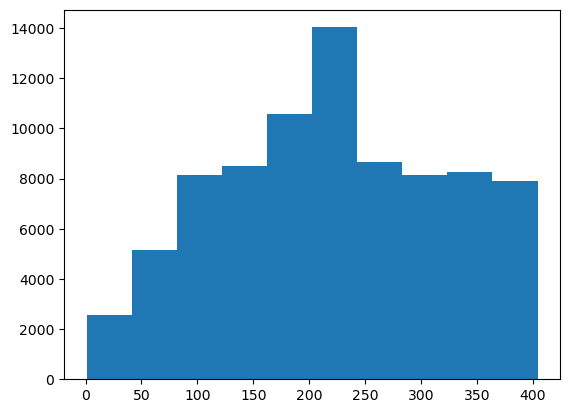

In [113]:
plt.hist(durations);

In [114]:
# Convert durations into a dictionary in the format:
    # {"0 Years 1 Months": 1, "1 Years 11 "Months": 23}
# To then replace values in the values in the dataset

durations_dict = dict()
for idx, dur in enumerate(train_data["Credit_History_Age"].dropna()):
    durations_dict[dur] = durations[idx]    

In [125]:
df = train_data.copy()
for idx, dur in enumerate(df["Credit_History_Age"]):
    if str(df.loc[idx, "Credit_History_Age"]) != "nan":
        df.loc[idx, "Credit_History_Age"] = durations_dict[dur]
        
        
        

### Exploring the Payment_of_Min_Amount column

In [115]:
train_data["Payment_of_Min_Amount"].dtype

dtype('O')

In [116]:
train_data["Payment_of_Min_Amount"][:10]

0     No
1    Yes
2     No
3    Yes
4     No
5     NM
6     No
7     NM
8    Yes
9    Yes
Name: Payment_of_Min_Amount, dtype: object

In [117]:
train_data["Payment_of_Min_Amount"].unique()

array(['No', 'Yes', 'NM'], dtype=object)

In [118]:
train_data["Payment_of_Min_Amount"].mode()

0    Yes
Name: Payment_of_Min_Amount, dtype: object

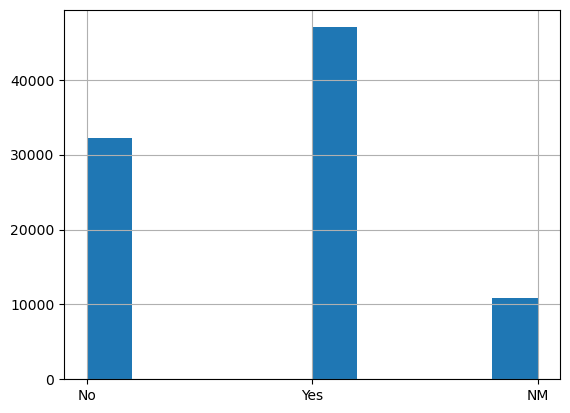

In [119]:
train_data["Payment_of_Min_Amount"].hist();

### Exploring the Total_EMI_per_month column

In [204]:
train_data["Total_EMI_per_month"].dtype

dtype('float64')

In [206]:
train_data["Total_EMI_per_month"][:10]

0      0.000000
1     61.098718
2    204.285650
3     27.106395
4    185.797654
5     56.839450
6     79.011419
7      0.000000
8     60.421743
9     24.300246
Name: Total_EMI_per_month, dtype: float64

In [207]:
train_data["Total_EMI_per_month"].isnull().sum()

0

In [208]:
train_data["Total_EMI_per_month"].min(), train_data["Total_EMI_per_month"].max()

(0.0, 82331.0)

In [209]:
train_data["Total_EMI_per_month"].mean(), train_data["Total_EMI_per_month"]

(1405.9299127746015, 68.9537584045176)

### Exploring the Amount_invested_monthly column

In [224]:
train_data["Amount_invested_monthly"].dtype

dtype('O')

In [228]:
train_data["Amount_invested_monthly"].isnull().sum()

3993

In [229]:
train_data["Amount_invested_monthly"][:10]

0    53.969385063055675
1    118.08021357217683
2    1255.8993022448951
3     66.81977464950728
4    115.52003931707223
5    182.90043954253653
6      621.000984980842
7     969.7324794302008
8     277.5692087071276
9    16.968028868748124
Name: Amount_invested_monthly, dtype: object

In [232]:
train_data["Amount_invested_monthly"].dropna().sort_values()

35974          0.0
49073          0.0
15616          0.0
49131          0.0
52681          0.0
           ...    
80278    __10000__
20657    __10000__
54685    __10000__
20544    __10000__
30416    __10000__
Name: Amount_invested_monthly, Length: 86007, dtype: object

In [257]:
print(f"Min: {train_data['Amount_invested_monthly'].replace('__10000__', np.nan).astype(float).min()}")

Min: 0.0


In [258]:
print(f"Max: {train_data['Amount_invested_monthly'].replace('__10000__', np.nan).astype(float).max()}")

Max: 1977.326102249349


In [259]:
print(f"Mean: {train_data['Amount_invested_monthly'].replace('__10000__', np.nan).astype(float).mean()}")

Mean: 195.4001587890895


In [260]:
print(f"Median: {train_data['Amount_invested_monthly'].replace('__10000__', np.nan).astype(float).median()}")

Median: 128.92611893952525


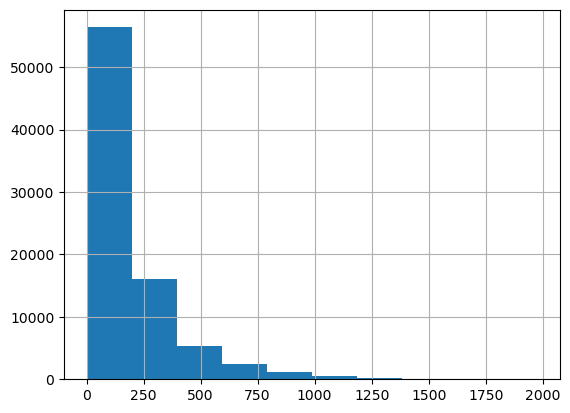

In [248]:
train_data["Amount_invested_monthly"].replace("__10000__", np.nan).astype(float).hist();

In [261]:
train_data["Payment_Behaviour"].dtype

dtype('O')

In [262]:
train_data["Payment_Behaviour"][:10]

0     High_spent_Large_value_payments
1      Low_spent_Small_value_payments
2      Low_spent_Small_value_payments
3      Low_spent_Small_value_payments
4    High_spent_Medium_value_payments
5     High_spent_Small_value_payments
6      Low_spent_Small_value_payments
7      Low_spent_Small_value_payments
8     High_spent_Small_value_payments
9      Low_spent_Small_value_payments
Name: Payment_Behaviour, dtype: object

In [263]:
train_data["Payment_Behaviour"].unique()

array(['High_spent_Large_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Small_value_payments', '!@9#%8',
       'Low_spent_Medium_value_payments',
       'Low_spent_Large_value_payments'], dtype=object)

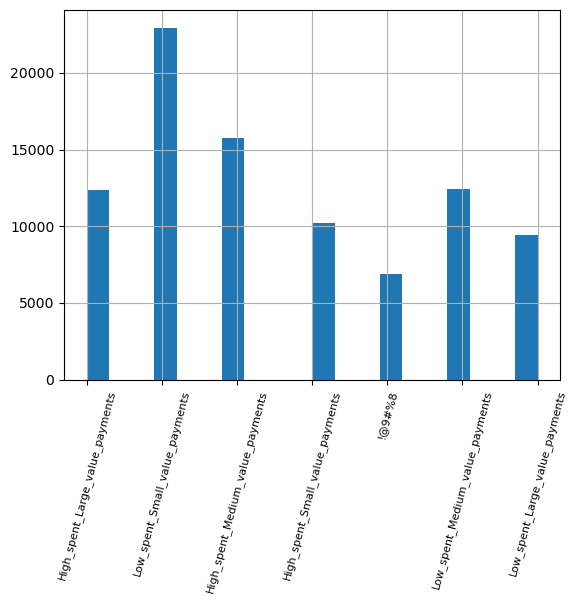

In [283]:
train_data["Payment_Behaviour"].hist(bins=20, xrot=75, xlabelsize=8);

In [284]:
train_data[train_data["Payment_Behaviour"] == "!@9#%8"].count()

ID                          6872
Customer_ID                 6872
Month                       6872
Name                        6206
Age                         6872
SSN                         6872
Occupation                  6872
Annual_Income               6872
Monthly_Inhand_Salary       5818
Num_Bank_Accounts           6872
Num_Credit_Card             6872
Interest_Rate               6872
Num_of_Loan                 6872
Type_of_Loan                6081
Delay_from_due_date         6872
Num_of_Delayed_Payment      6338
Changed_Credit_Limit        6872
Num_Credit_Inquiries        6722
Credit_Mix                  6872
Outstanding_Debt            6872
Credit_Utilization_Ratio    6872
Credit_History_Age          6255
Payment_of_Min_Amount       6872
Total_EMI_per_month         6872
Amount_invested_monthly     6556
Payment_Behaviour           6872
Monthly_Balance             6787
Credit_Score                6872
dtype: int64

### Exploring the Monthly_Balance column

In [287]:
train_data["Monthly_Balance"].dtype

dtype('O')

In [288]:
train_data["Monthly_Balance"].isnull().sum()

1084

In [289]:
train_data["Monthly_Balance"][:10]

0     554.9302816036111
1     238.3144849566528
2                   NaN
3    359.23391378882377
4     697.4005568630175
5     411.9493600449131
6     66.52676256935598
7     474.5545205697992
8     533.7035485614954
9    295.82718369565544
Name: Monthly_Balance, dtype: object

In [290]:
# Check for bad data 
for i in train_data["Monthly_Balance"].dropna():
    try:
        float(i)
    except:
        print(i)
    

__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__


In [294]:
print(f"Min: {train_data['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan).astype(float).min()}")

Min: 0.007759664775335295


In [295]:
print(f"Max: {train_data['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan).astype(float).max()}")

Max: 1602.0405189622518


In [296]:
print(f"Mean: {train_data['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan).astype(float).mean()}")

Mean: 402.7025155502235


In [297]:
print(f"Median: {train_data['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan).astype(float).median()}")

Median: 336.8559882233404


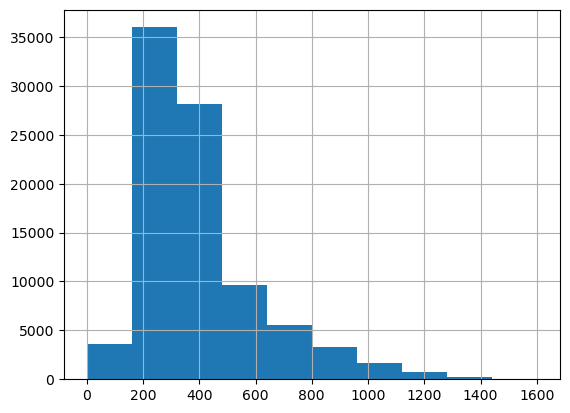

In [298]:
train_data['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan).astype(float).hist();

### Exploring the target column: Credit_Score

In [328]:
train_data["Credit_Score"].dtype

dtype('O')

In [329]:
train_data["Credit_Score"][:10]

0        Good
1        Poor
2        Good
3        Poor
4        Good
5        Poor
6        Good
7        Poor
8        Good
9    Standard
Name: Credit_Score, dtype: object

In [345]:
train_data["Credit_Score"].unique()

array(['Good', 'Poor', 'Standard'], dtype=object)

In [330]:
train_data["Credit_Score"].isnull().sum()

0

In [334]:
train_data["Credit_Score"].mode()

0    Standard
Name: Credit_Score, dtype: object

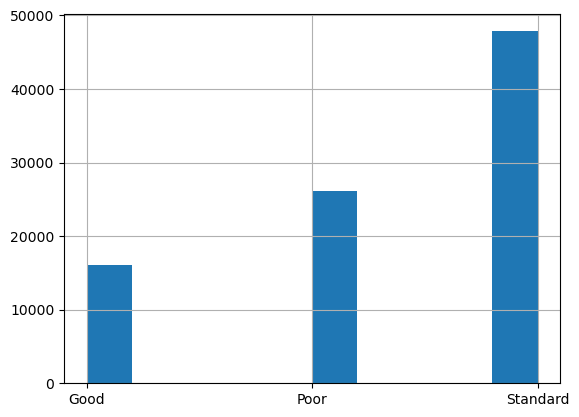

In [331]:
train_data["Credit_Score"].hist();

In [346]:
def preprocess_data(df):
    # Remove unnecessary columns
    df = df.drop(columns=["ID", "Customer_ID", "Name", "SSN"])
    
    # Remove _ at the end of number in Age
    for i in df["Age"]:
        if "_" in i:
            df["Age"].replace(i, i[:-1], inplace=True)

    # Cast Age to float
    df["Age"] = df["Age"].astype(float)
            
    # Remove unreal ages
    df = df[~(df["Age"] < 0)]
    df = df[~(df["Age"] > 120)]

    # Remove weird thing in Occupation
    df = df[df["Occupation"] != "_______"]
    
    # Remove _ at the end of numbers in Annual_Income
    for i in df["Annual_Income"]:
        if "_" in i:
            df["Annual_Income"].replace(i, i[:-1], inplace=True)
        
    # Cast Annual_Income as float
    df["Annual_Income"] = df["Annual_Income"].astype(float)
    
    # Replace unreal data with a set maximum
    for i in df["Num_Bank_Accounts"]:
        if i > 40:
            df["Num_Bank_Accounts"].replace(i, 40, inplace=True)
    
    # Replace -1 banking accounts with 0
    df["Num_Bank_Accounts"].replace(-1, 0, inplace=True)
    
    # Replace unreal data with a set maximum  
    for i in df["Num_Credit_Card"]:
        if i > 40:
            df["Num_Credit_Card"].replace(i, 40, inplace=True)
    
    # Remove _ at the end of numbers in Num_of_Loan
    for i in df["Num_of_Loan"]:
        if "_" in i:
            df["Num_of_Loan"].replace(i, i[:-1], inplace=True)
    
    # Cast the type of Num_of_Loan to float 
    df["Num_of_Loan"] = df["Num_of_Loan"].astype(float)
    
    # Replace negative values with nulls to then substitute with average values
    for i in df["Num_of_Loan"]:
         if i < 0:
            df["Num_of_Loan"].replace(i, np.nan, inplace=True)
            
    # Replace nulls to unspecified Type_of_Loan
    df["Type_of_Loan"] = df["Type_of_Loan"].replace(np.nan, "Not Specified")
    
    # unique_words list was copied from above column parsing
    unique_words = ['Payday Loan','Auto Loan', 'Credit-Builder Loan', 'Home Equity Loan', 'Mortgage Loan','Debt Consolidation Loan','Student Loan','Personal Loan',  'Not Specified']
    
    # Create corresponding columns for each loan type, and assign 0 or 1
    for i in unique_words:
        df[i.replace(" ", "_")] = [int(i in j) for j in df["Type_of_Loan"]]
        
    # Drop the Type_of_Loan Column since we don't need it anymore
    df = df.drop(columns="Type_of_Loan")
    
    # Remove "_" in the Num_of_Delayed_Payment column
    for i in df["Num_of_Delayed_Payment"].dropna():
        if "_" in i:
            df["Num_of_Delayed_Payment"].replace(i, i[:-1], inplace=True)
            

    # Cast the type into int
    df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].astype(float)
    
    # Replace "_" with NaN 
    df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].replace("_", np.nan)
    df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].astype(float)
    
    # Remove "_" in the Credit_Mix column
    df = df[df["Credit_Mix"] != "_"]
    
    # Change categories into ordinal values in Credit_Mix: Bad = 0, Standard = 1, Good = 2 
    credit_mix_categories = {"Bad": 0, "Standard": 1, "Good": 2}
    for i in df["Credit_Mix"].unique():
        df["Credit_Mix"].replace(i, credit_mix_categories[i], inplace=True)
        
    
    # Remove "_" at the end of numbers in Outstanding_Debt
    for i in df["Outstanding_Debt"]:
        if "_" in i:
            df["Outstanding_Debt"].replace(i, i[:-1], inplace=True)
            
    # Cast Outstanding_Debt into float 
    df["Outstanding_Debt"] = df["Outstanding_Debt"].astype(float)
            
        
    # Split durations into years and months
    durations_split = [i.split("and") for i in df["Credit_History_Age"].dropna()]   
    
    # Remove "Years" and "Months", convert numbers into integers, calculate the total duration in months
    durations = [int((i[0].split()[0])) * 12 + int(i[1].split()[0]) for i in durations_split]
    
    
    # Convert durations into a dictionary in the format:
            # {"0 Years 1 Months": 1, "1 Years 11 "Months": 23}
    # To then replace values in the values in the dataset
    durations_dict = dict()
    for idx, dur in enumerate(df["Credit_History_Age"].dropna()):
        durations_dict[dur] = durations[idx]  
    
    
    # Reset dataframe indeces for the next cleaning process
    df.reset_index(inplace=True)
    
    # Replace all non-null durations to numbers (skip nulls for now)
    for idx, dur in enumerate(df["Credit_History_Age"]):
        if str(df.loc[idx, "Credit_History_Age"]) != "nan":
            df.loc[idx, "Credit_History_Age"] = durations_dict[dur]
            
    
    # Cast the type into float
    df["Credit_History_Age"] = df["Credit_History_Age"].astype(float)
            
            
    # Replace categories into ordinal values in Payment_of_Min_Amount: No = 0, Yes = 1, NM = 3 
    payment_min_amount_categories = {"No": 0, "Yes": 1, "NM":2}

    for i in df["Payment_of_Min_Amount"].unique():
        df["Payment_of_Min_Amount"].replace(i, payment_min_amount_categories[i], inplace=True)
        
        
    # Replace __10000__ in Amount_invested_montly with nulls
    df["Amount_invested_monthly"].replace("__10000__", np.nan, inplace=True)
    
    # Cast the type into float
    df["Amount_invested_monthly"] = df["Amount_invested_monthly"].astype(float)
    
    # Replace !@9#%8 in Payment_Behaviour with nulls
    df["Payment_Behaviour"].replace("!@9#%8", np.nan, inplace=True)
    
    # Replace __-333333333333333333333333333__ with nulls
    df['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan, inplace=True)
    
    # Cast the type into float
    df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)
    
    # Replace target categories into ordinal values in Credit_Score: Poor = 0, Standard = 1, Good = 2
    target_categories = {"Poor": 0, "Standard": 1, "Good":2}

    for i in df["Credit_Score"].unique():
        df["Credit_Score"].replace(i, target_categories[i], inplace=True)
     
    # Cast the type into int
    df["Credit_Score"] = df["Credit_Score"].astype(int)
    
    ## nulls: Monthly_Inhand_Salary

    
    return df

In [347]:
test = train_data.copy()

In [348]:
test = preprocess_data(test)
test

index     Month   Age    Occupation  Annual_Income  \
0          0  February  30.0       Manager      43391.960   
1          1   January  18.0     Scientist      14351.210   
2          2   January  41.0     Developer     130125.040   
3          3     April  35.0       Manager      20107.210   
4          4    August  27.0        Doctor      92186.190   
...      ...       ...   ...           ...            ...   
64889  89993     April  36.0        Doctor      38186.840   
64890  89994      July  31.0        Lawyer     119113.710   
64891  89995     April  18.0        Lawyer       9635.555   
64892  89997     April  41.0        Doctor      30416.280   
64893  89999     March  41.0  Entrepreneur      67500.540   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0                3688.996667                  1                5   
1                        NaN                  8                7   
2               10871.753333                  5                2   
3                1631.600833                  6                6   
4                7487.182500                  1                2   
...                      ...                ...              ...   
64889            3428.236667                  8                6   
64890            9694.142500                  4                7   
64891            1034.962917                 10                8   
64892            2346.690000                  5                4   
64893            5642.045000                  7                5   

       Interest_Rate  Num_of_Loan  ...  Credit_Score  Payday_Loan  Auto_Loan  \
0                 10          0.0  ...             2            0          0   
1                 18          6.0  ...             0            0          0   
2                 11          2.0  ...             2            0          0   
3                 32          2.0  ...             0            0          0   
4                 12          4.0  ...             2            0          1   
...              ...          ...  ...           ...          ...        ...   
64889             20          9.0  ...             1            1          0   
64890              4          2.0  ...             2            0          1   
64891             23          7.0  ...             0            1          1   
64892              4          0.0  ...             2            0          0   
64893           5707          5.0  ...             1            0          1   

       Credit-Builder_Loan  Home_Equity_Loan  Mortgage_Loan  \
0                        0                 0              0   
1                        0                 0              1   
2                        0                 0              1   
3                        1                 1              0   
4                        0                 0              0   
...                    ...               ...            ...   
64889                    0                 0              1   
64890                    0                 0              0   
64891                    0                 1              0   
64892                    0                 0              0   
64893                    1                 0              0   

       Debt_Consolidation_Loan  Student_Loan  Personal_Loan  Not_Specified  
0                            0             0              0              1  
1                            0             1              1              1  
2                            1             0              0              0  
3                            0             0              0              0  
4                            0             0              1              1  
...                        ...           ...            ...            ...  
64889                        1             1              1              0  
64890                        0             0              1              0  
64891                        1             1  